In [ ]:
!pip install selenium --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import math
import time
import pandas as pd

In [ ]:
options = webdriver.ChromeOptions()

options.add_argument('--disable-gpu')
options.add_argument('--single-process')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('headless')
options.binary_location = "/usr/bin/google-chrome"

driver = webdriver.Chrome(options=options)


url='https://www.linkedin.com/login/it?fromSignIn=true&trk=guest_homepage-basic_nav-header-signin'
driver.get(url)
driver.find_element(By.NAME, value='session_key').send_keys('omatejal1@email.com')
driver.find_element(By.NAME, value='session_password').send_keys('Gurudev@03' + Keys.ENTER)
job_url='https://www.linkedin.com/jobs/search/?keywords=Data%20Scientist&location=Barcellona&origin=JOBS_HOME_LOCATION_SUGGESTION&refresh=false'
driver.get(job_url)

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 91
Current browser version is 130.0.6723.91 with binary path /usr/bin/google-chrome
Stacktrace:
#0 0x57eb2cd1aee9 <unknown>


In [ ]:
import re
def number_results(soup):

    class_name_search='display-flex t-normal t-12 t-black--light jobs-search-results-list__text'

    for object_html in soup.find_all('small'):
        try:

            class_name=' '.join(object_html['class'])

            if class_name_search==class_name:

                for span in object_html.find_all('span'):

                    result = re.search(r'\d+', span.text.replace(',', ''))

                    return int(''.join(result.group()))
        except:
            next

In [ ]:

soup=BeautifulSoup(driver.page_source,'html.parser')

total_results=number_results(soup)
print(total_results)

total_results=50

1613


In [ ]:

def save_html(soup, page):

    with open('html_jobs/html_job_listing_page' + str(page) + '.html', 'w', encoding='utf-8') as f:
        f.write(soup.prettify())

    print('HTML saved')

    return

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

for i in range(0, total_results, 25):
    job_url = f'https://www.linkedin.com/jobs/search/?keywords=Data%20Scientist&location=Barcellona&origin=JOBS_HOME_LOCATION_SUGGESTION&refresh=false&start={i}'
    driver.get(job_url)
    wait = WebDriverWait(driver, 10)
    elements = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'li.ember-view.jobs-search-results__job-card-search--generic-occludable-area')))
    print(elements)


    for element in elements:
        driver.execute_script("arguments[0].scrollIntoView();", element)
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    save_html(soup, int((i/25)+1))

[<selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_153")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_154")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_155")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_156")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_157")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c53e9", element="6A99F64140469F932ACBBAA1CCABD8C4_element_158")>, <selenium.webdriver.remote.webelement.WebElement (session="f990f8db6b059c96e372d99eb50c

In [ ]:
# Define a function to extract job IDs from parsed HTML content
def job_ids(soup):
    class_name_search='ember-view jobs-search-results__list-item occludable-update p0 relative scaffold-layout__list-item'
    class_name_search_hidden='ember-view jobs-search-results__job-card-search--generic-occludable-area jobs-search-results__list-item occludable-update p0 relative scaffold-layout__list-item'

    job_ids=[]t
    for object_html in soup.find_all('li'):

        try:


            class_name=' '.join(object_html['class'])

            if class_name_search==class_name or class_name_search_hidden==class_name:

                job_ids.append(int(object_html['data-occludable-job-id']))


        except:
            next
    return job_ids

In [ ]:
from bs4 import BeautifulSoup
import os

folder_path = 'html_jobs'
file_list = os.listdir(folder_path)
job_id_list = []

for file_name in file_list:
    with open(folder_path+'/'+file_name, 'r', encoding='utf-8') as html_file:
        soup = BeautifulSoup(html_file, 'html.parser')
        job_id_list = job_id_list + job_ids(soup)


In [ ]:
print(len(list(set(job_id_list))))

50


In [ ]:
def save_single_html(soup, job_id):
    with open('html_single_job/html_job_' + str(job_id) + '.html', 'w', encoding='utf-8') as f:
        f.write(soup.prettify())
    print('HTML saved')
    return


In [ ]:
x = 25
job_id_list=list(set(job_id_list))[:x]

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

job_id_to_drop = []

for job_id in job_id_list:
    try:
        job_url = 'https://www.linkedin.com/jobs/view/' + str(job_id)
        driver.get(job_url)
        wait = WebDriverWait(driver, 10)
        elements = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'a.ember-view.link-without-visited-state.inline-block.t-black')))
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        save_single_html(soup, job_id)
    except:
        job_id_to_drop.append(job_id)


HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved
HTML saved


In [ ]:
# Calculate the count of job IDs that encountered errors or exceptions and are therefore in the list job_id_to_drop
len(job_id_to_drop)

0

# Scraping offline


In [ ]:
def scraping_job_listing(soup):
    job_data = []
    for object_html in soup.find_all('li', class_='ember-view jobs-search-results__list-item occludable-update p0 relative scaffold-layout__list-item'):
        job_id = int(object_html['data-occludable-job-id'])
        promoted = bool(object_html.find('li', class_='job-card-container__footer-item inline-flex align-items-center'))
        job_title = object_html.find('a', class_='disabled ember-view job-card-container__link job-card-list__title').text.strip()
        company = object_html.find('span', class_='job-card-container__primary-description').text.strip()
        location = object_html.find('li', class_='job-card-container__metadata-item').text.strip()

        if location[-1] == ')':
            workspace = location.split('(')[1][:-1]
            location = location.split('(')[0].strip()
        else:
            workspace = 'Other'

        state = object_html.find('div', class_='job-card-container__job-insight-text')
        if state:
            state = state.text.strip()
            if state == 'Actively recruiting':
                state = 'On-going'
            elif state == 'Early applicant':
                state = 'Early Applications'
            else:
                state = 'Others'
        else:
            state = 'Others'

        offer_url = 'https://www.linkedin.com/jobs/view/' + str(job_id)
        job_data.append([job_id, job_title, company, location, workspace, state, offer_url, promoted])
    return job_data


In [ ]:
from bs4 import BeautifulSoup
import os

folder_path = 'html_jobs'
file_list = os.listdir(folder_path)
job_data = []

for file_name in file_list:
    with open(folder_path + '/' + file_name, 'r', encoding='utf-8') as html_file:
        soup = BeautifulSoup(html_file, 'html.parser')
        job_data = job_data + scraping_job_listing(soup)


In [ ]:
df=pd.DataFrame(data=job_data, columns=['Job ID', 'Job Title', 'Company Name', 'Location', 'Workspace', 'State', 'Offer URL', 'Promoted'])
df.head()

,Job ID,Job Title,Company Name,Location,Workspace,State,Offer URL,Promoted
0,3690425439,Ruby on Rails Developer,Stream Hatchet,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3690425439,True
1,3736663947,"Lead Data Scientist (Bangkok based, relocation...",Agoda,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3736663947,True
2,3772484774,"Infrastructure & Cloud Operations Engineer, (H...",Joppy,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3772484774,True
3,3742882559,Senior Data Scientist - Marketplace (They/She/He),Glovo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3742882559,True
4,3770337197,Risk Decision Scientist (They/She/He),Glovo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3770337197,False


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job ID        50 non-null     int64 
 1   Job Title     50 non-null     object
 2   Company Name  50 non-null     object
 3   Location      50 non-null     object
 4   Workspace     50 non-null     object
 5   State         50 non-null     object
 6   Offer URL     50 non-null     object
 7   Promoted      50 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:

df=df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job ID        50 non-null     int64 
 1   Job Title     50 non-null     object
 2   Company Name  50 non-null     object
 3   Location      50 non-null     object
 4   Workspace     50 non-null     object
 5   State         50 non-null     object
 6   Offer URL     50 non-null     object
 7   Promoted      50 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:

df = df[~df['Job ID'].isin(job_id_to_drop)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job ID        50 non-null     int64 
 1   Job Title     50 non-null     object
 2   Company Name  50 non-null     object
 3   Location      50 non-null     object
 4   Workspace     50 non-null     object
 5   State         50 non-null     object
 6   Offer URL     50 non-null     object
 7   Promoted      50 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:
df = df[df['Job ID'].isin(job_id_list)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job ID        25 non-null     int64 
 1   Job Title     25 non-null     object
 2   Company Name  25 non-null     object
 3   Location      25 non-null     object
 4   Workspace     25 non-null     object
 5   State         25 non-null     object
 6   Offer URL     25 non-null     object
 7   Promoted      25 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.6+ KB


In [ ]:

df.head()

,Job ID,Job Title,Company Name,Location,Workspace,State,Offer URL,Promoted
1,3736663947,"Lead Data Scientist (Bangkok based, relocation...",Agoda,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3736663947,True
2,3772484774,"Infrastructure & Cloud Operations Engineer, (H...",Joppy,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3772484774,True
4,3770337197,Risk Decision Scientist (They/She/He),Glovo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3770337197,False
8,3761871874,Senior Data Scientist,Capgemini Engineering,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3761871874,True
10,3757333127,"Data Scientist (Mid-level, Senior) | Candy Cru...",King,"Barcelona, Catalonia, Spain",Other,Others,https://www.linkedin.com/jobs/view/3757333127,False


In [ ]:
def scraping_job(job_id):
    print(job_id)
    folder_path = 'html_single_job/'
    job_single = 'html_job_' + str(job_id) + '.html'

    try:
        with open(folder_path + job_single, 'r', encoding='utf-8') as html_file:
            soup_job = BeautifulSoup(html_file, 'html.parser')
    except:
        return [job_id, None, None, None, None, None, None, None, None, None]

    skills = soup_job.find('a', class_='app-aware-link job-details-how-you-match__skills-item-subtitle t-14 overflow-hidden').text.replace(' ', '').replace('and', '').strip().split(',')
    python_required = 'Python' in skills

    seniority = soup_job.find_all('span', class_='job-details-jobs-unified-top-card__job-insight-view-model-secondary')
    if seniority and len(seniority) > 1:
        seniority = seniority[1].text.strip()
    else:
        seniority = None

    print(seniority)

    posting_date = soup_job.find('span', class_='tvm__text tvm__text--neutral').find_all('span')[-1].text.strip()
    print(posting_date)

    try:
        number_applicants = int(soup_job.find_all('span', class_='tvm__text tvm__text--neutral')[-1].text.strip().split(' ')[0])
        print(number_applicants)
    except:
        try:
            number_applicants = int(soup_job.find('span', class_='tvm__text tvm__text--positive').find('strong').text.strip().split(' ')[0])
            print(number_applicants)
        except:
            number_applicants = None

    try:
        employment_type = soup_job.find('span', class_='job-details-jobs-unified-top-card__job-insight-view-model-secondary').text.strip()
        print(employment_type)
    except:
        employment_type = soup_job.find('li', class_='job-details-jobs-unified-top-card__job-insight').find('span').find('span').text.strip()

    industry_employees = soup_job.find_all('li', class_='job-details-jobs-unified-top-card__job-insight')[1].find('span').text.strip().split(' · ')
    try:
        industry = industry_employees[1]
        employees = industry_employees[0]
    except:
        employees = industry_employees[0]
        industry = None

    print(industry)
    print(employees)

    linkedin = True if soup_job.find('button', class_='jobs-apply-button artdeco-button artdeco-button--3 artdeco-button--primary ember-view') else False
    print(linkedin)

    try:
        followers = int(soup_job.find('div', class_='artdeco-entity-lockup__subtitle ember-view t-16').text.strip().split(' ')[0].replace(',', ''))
        print(followers)
    except:
        followers = None

    return [job_id, python_required, seniority, posting_date, number_applicants, employment_type, industry, employees, linkedin, followers]


In [ ]:

new_columns = df['Job ID'][:25].apply(lambda x: scraping_job(x))

3736663947
Mid-Senior level
2 weeks ago
9
Full-time
Software Development
5,001-10,000 employees
False
519604
3772484774


None
1 week ago
21
Full-time
None
1-10 employees
False
8022
3770337197
Entry level
2 weeks ago
29
Full-time
Consumer Services
1,001-5,000 employees
False
248107
3761871874
None
3 weeks ago
76
Full-time
IT Services and IT Consulting
10,001+ employees
True
1988677
3757333127
None
1 week ago
64
Entertainment Providers
1,001-5,000 employees
False
168175
3761478277
Mid-Senior level
3 weeks ago
37
Full-time
Information Technology & Services
201-500 employees
False
23119
3765095612
Associate
3 weeks ago
116
Full-time
IT Services and IT Consulting
11-50 employees
True
244
3688372389
Mid-Senior level
2 weeks ago
136
Full-time
Advertising Services
1,001-5,000 employees
False
207496
3772496286
None
1 week ago
214
Full-time
None
51-200 employees
True
4811
3750808229
Mid-Senior level
1 month ago
92
Full-time
IT Services and IT Consulting
10,001+ employees
False
5056139
3694929706
Entry level
1 week ago
262
Full-time
Entertainment Providers
1,001-5,000 employees
False
129987
3745692455
Entry level
2

In [ ]:
print(new_columns)

1     [3736663947, False, Mid-Senior level, 2 weeks ...
2     [3772484774, False, None, 1 week ago, 21, Full...
4     [3770337197, False, Entry level, 2 weeks ago, ...
8     [3761871874, True, None, 3 weeks ago, 76, Full...
10    [3757333127, False, None, 1 week ago, 64, Full...
11    [3761478277, True, Mid-Senior level, 3 weeks a...
12    [3765095612, True, Associate, 3 weeks ago, 116...
13    [3688372389, False, Mid-Senior level, 2 weeks ...
15    [3772496286, True, None, 1 week ago, 214, Full...
16    [3750808229, False, Mid-Senior level, 1 month ...
24    [3694929706, False, Entry level, 1 week ago, 2...
27    [3745692455, False, Entry level, 2 weeks ago, ...
31    [3769281201, False, Associate, 1 week ago, 716...
32    [3737223750, False, Mid-Senior level, 2 weeks ...
33    [3768785578, True, Mid-Senior level, 1 week ag...
34    [3763879318, False, Associate, 1 week ago, 43,...
36    [3773544884, False, Mid-Senior level, 5 days a...
37    [3493569296, True, Associate, 2 weeks ago,

In [ ]:

new_columns_df = pd.DataFrame(new_columns.tolist(), columns=['Job ID', 'Python Required', 'Seniority', 'Posting Date', 'Number of Applicants', 'Employment Type', 'Industry', 'Employees', 'LinkedIn Easy Apply', 'Company Followers'])

new_columns_df.head()

,Job ID,Python Required,Seniority,Posting Date,Number of Applicants,Employment Type,Industry,Employees,LinkedIn Easy Apply,Company Followers
0,3736663947,False,Mid-Senior level,2 weeks ago,9,Full-time,Software Development,"5,001-10,000 employees",False,519604
1,3772484774,False,None,1 week ago,21,Full-time,None,1-10 employees,False,8022
2,3770337197,False,Entry level,2 weeks ago,29,Full-time,Consumer Services,"1,001-5,000 employees",False,248107
3,3761871874,True,None,3 weeks ago,76,Full-time,IT Services and IT Consulting,"10,001+ employees",True,1988677
4,3757333127,False,None,1 week ago,64,Full-time,Entertainment Providers,"1,001-5,000 employees",False,168175


In [ ]:

df = pd.merge(df, new_columns_df, how='left', on='Job ID')

df.head(25)

,Job ID,Job Title,Company Name,Location,Workspace,State,Offer URL,Promoted,Python Required,Seniority,Posting Date,Number of Applicants,Employment Type,Industry,Employees,LinkedIn Easy Apply,Company Followers
0,3736663947,"Lead Data Scientist (Bangkok based, relocation...",Agoda,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3736663947,True,False,Mid-Senior level,2 weeks ago,9,Full-time,Software Development,"5,001-10,000 employees",False,519604
1,3772484774,"Infrastructure & Cloud Operations Engineer, (H...",Joppy,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3772484774,True,False,None,1 week ago,21,Full-time,None,1-10 employees,False,8022
2,3770337197,Risk Decision Scientist (They/She/He),Glovo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3770337197,False,False,Entry level,2 weeks ago,29,Full-time,Consumer Services,"1,001-5,000 employees",False,248107
3,3761871874,Senior Data Scientist,Capgemini Engineering,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3761871874,True,True,None,3 weeks ago,76,Full-time,IT Services and IT Consulting,"10,001+ employees",True,1988677
4,3757333127,"Data Scientist (Mid-level, Senior) | Candy Cru...",King,"Barcelona, Catalonia, Spain",Other,Others,https://www.linkedin.com/jobs/view/3757333127,False,False,None,1 week ago,64,Full-time,Entertainment Providers,"1,001-5,000 employees",False,168175
5,3761478277,Senior Data Scientist,Heetch,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3761478277,True,True,Mid-Senior level,3 weeks ago,37,Full-time,Information Technology & Services,201-500 employees,False,23119
6,3765095612,Data Engineer,ALPHABET CONSULTING,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3765095612,True,True,Associate,3 weeks ago,116,Full-time,IT Services and IT Consulting,11-50 employees,True,244
7,3688372389,Sr. Data Scientist,Criteo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3688372389,True,False,Mid-Senior level,2 weeks ago,136,Full-time,Advertising Services,"1,001-5,000 employees",False,207496
8,3772496286,Junior PySpark Data Engineer,Mática Partners,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3772496286,True,True,None,1 week ago,214,Full-time,None,51-200 employees,True,4811
9,3750808229,Data Scientist,HP,"Sant Cugat del Vallès, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3750808229,False,False,Mid-Senior level,1 month ago,92,Full-time,IT Services and IT Consulting,"10,001+ employees",False,5056139


In [ ]:
df = pd.read_csv("/content/job_listings.csv")

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


geolocator = Nominatim(user_agent="geoapi")


def get_lat_long(location_name):
    geolocator = Nominatim(user_agent="geopy_example",timeout=10)
    location = geolocator.geocode(location_name)

    if location:
        latitude, longitude = location.latitude, location.longitude
        return latitude, longitude
    else:
        return None

df['First_Location'] = df['Location'].str.split().str[0]

df[['Latitude', 'Longitude']] = df['First_Location'].apply(get_lat_long).apply(pd.Series)

df


,Job ID,Job Title,Company Name,Location,Workspace,State,Offer URL,Promoted,Python Required,Seniority,Posting Date,Number of Applicants,Employment Type,Industry,Employees,LinkedIn Easy Apply,Company Followers,First_Location,Latitude,Longitude
0,3736663947,"Lead Data Scientist (Bangkok based, relocation...",Agoda,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3736663947,True,False,Mid-Senior level,2 weeks ago,9,Full-time,Software Development,"5,001-10,000 employees",False,519604.0,"Barcelona,",41.382894,2.177432
1,3772484774,"Infrastructure & Cloud Operations Engineer, (H...",Joppy,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3772484774,True,False,NaN,1 week ago,21,Full-time,NaN,1-10 employees,False,8022.0,"Barcelona,",41.382894,2.177432
2,3770337197,Risk Decision Scientist (They/She/He),Glovo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3770337197,False,False,Entry level,2 weeks ago,29,Full-time,Consumer Services,"1,001-5,000 employees",False,248107.0,"Barcelona,",41.382894,2.177432
3,3761871874,Senior Data Scientist,Capgemini Engineering,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3761871874,True,True,NaN,3 weeks ago,76,Full-time,IT Services and IT Consulting,"10,001+ employees",True,1988677.0,"Barcelona,",41.382894,2.177432
4,3757333127,"Data Scientist (Mid-level, Senior) | Candy Crush",King,"Barcelona, Catalonia, Spain",Other,Others,https://www.linkedin.com/jobs/view/3757333127,False,False,NaN,1 week ago,64,Full-time,Entertainment Providers,"1,001-5,000 employees",False,168175.0,"Barcelona,",41.382894,2.177432
5,3761478277,Senior Data Scientist,Heetch,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3761478277,True,True,Mid-Senior level,3 weeks ago,37,Full-time,Information Technology & Services,201-500 employees,False,23119.0,Greater,-37.814245,144.963173
6,3765095612,Data Engineer,ALPHABET CONSULTING,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3765095612,True,True,Associate,3 weeks ago,116,Full-time,IT Services and IT Consulting,11-50 employees,True,244.0,Greater,-37.814245,144.963173
7,3688372389,Sr. Data Scientist,Criteo,"Barcelona, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3688372389,True,False,Mid-Senior level,2 weeks ago,136,Full-time,Advertising Services,"1,001-5,000 employees",False,207496.0,"Barcelona,",41.382894,2.177432
8,3772496286,Junior PySpark Data Engineer,Mática Partners,Greater Barcelona Metropolitan Area,Hybrid,Others,https://www.linkedin.com/jobs/view/3772496286,True,True,NaN,1 week ago,214,Full-time,NaN,51-200 employees,True,4811.0,Greater,-37.814245,144.963173
9,3750808229,Data Scientist,HP,"Sant Cugat del Vallès, Catalonia, Spain",Hybrid,Others,https://www.linkedin.com/jobs/view/3750808229,False,False,Mid-Senior level,1 month ago,92,Full-time,IT Services and IT Consulting,"10,001+ employees",False,5056139.0,Sant,46.018591,103.965602


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import folium
import cartopy.crs as ccrs


In [ ]:
import pandas as pd
import folium

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['First_Location'],
        icon=folium.Icon(color="blue", icon="info-sign"),
    ).add_to(m)

m.save("company_job_locations_map.html")
m


In [ ]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


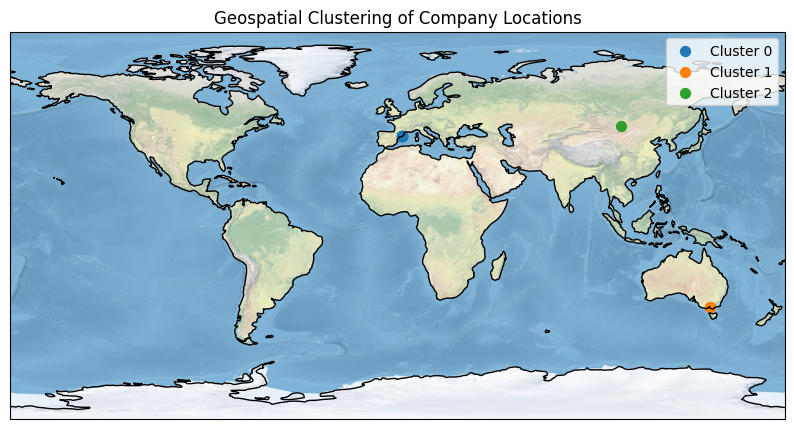

In [ ]:
coordinates = gdf[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

dbscan = DBSCAN(eps=0.5, min_samples=1)
gdf['Cluster'] = dbscan.fit_predict(coordinates_scaled)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.stock_img()

for cluster in gdf['Cluster'].unique():
    clustered_points = gdf[gdf['Cluster'] == cluster]
    clustered_points.plot(ax=ax, marker='o', markersize=50, label=f'Cluster {cluster}', transform=ccrs.PlateCarree())

plt.legend()
plt.title('Geospatial Clustering of Company Locations')
plt.show()


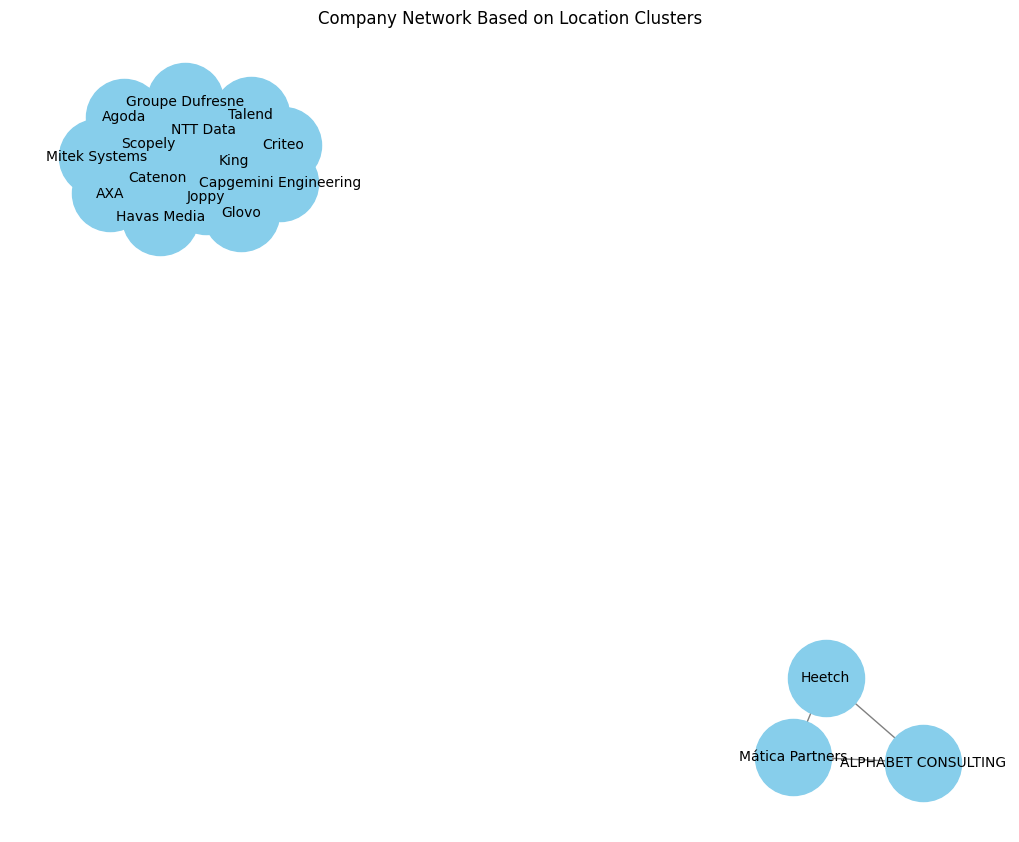

In [ ]:

G = nx.Graph()
for cluster in gdf['Cluster'].unique():
    clustered_points = gdf[gdf['Cluster'] == cluster]
    for i, company1 in clustered_points.iterrows():
        for j, company2 in clustered_points.iterrows():
            if i < j:
                G.add_edge(company1['Company Name'], company2['Company Name'], cluster=cluster)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='grey', node_size=3000, font_size=10)
plt.title('Company Network Based on Location Clusters')
plt.show()
